In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier, MLPRegressor

In [2]:
data = pd.read_csv("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.csv")

In [3]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                       1200 non-null object
Age                             1200 non-null int64
Gender                          1200 non-null object
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null object
EmpDepartment                   1200 non-null object
EmpJobRole                      1200 non-null object
BusinessTravelFrequency         1200 non-null object
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null object
E

In [5]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [7]:
data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [8]:
from collections import Counter
Counter(data.PerformanceRating)

Counter({3: 874, 4: 132, 2: 194})

In [9]:
%matplotlib inline

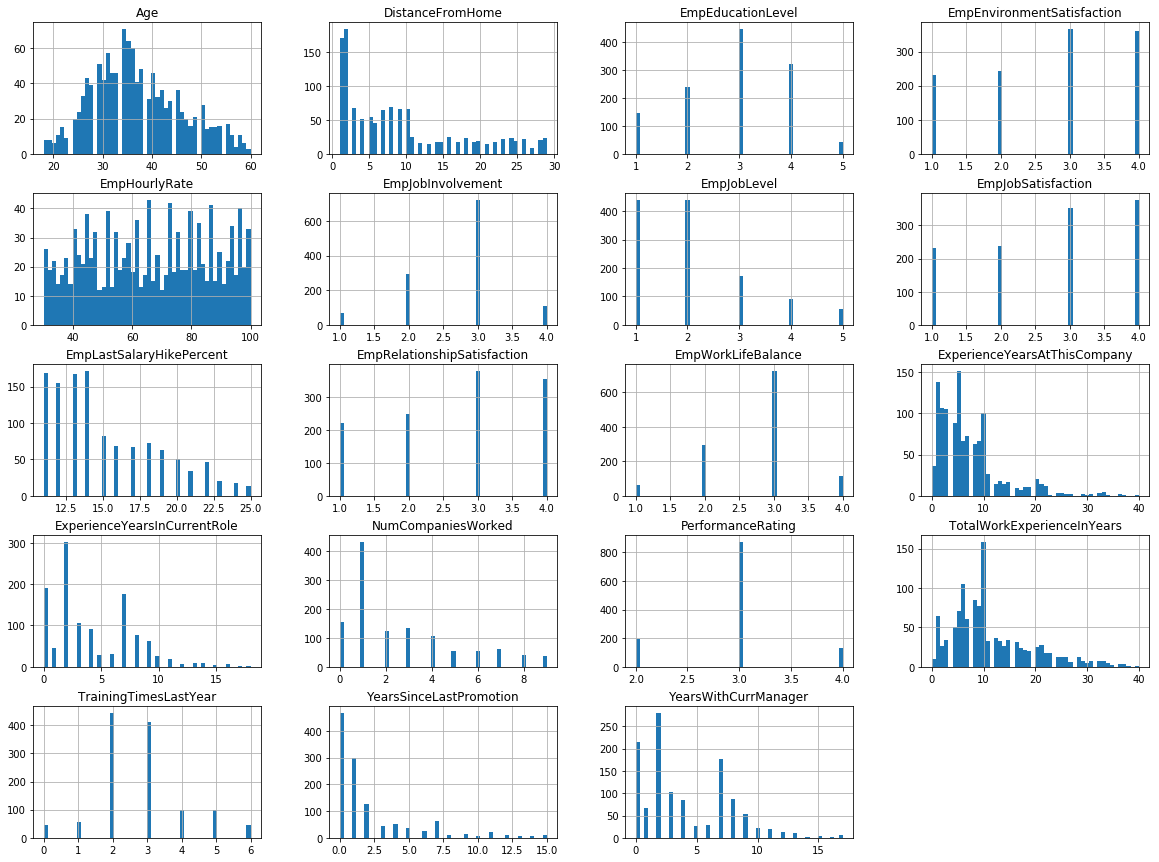

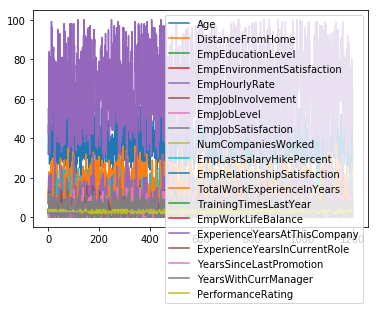

In [10]:
data.hist(bins=50, figsize=(20,15))
data.plot()

In [1]:
plt.figure(figsize = (15,40))
plt.subplot(13,3,1)
sns.barplot(data['PerformanceRating'], data['Age'])
plt.subplot(13,3,3)
sns.barplot(data['PerformanceRating'], data['Gender'])
plt.subplot(13,3,4)
sns.barplot(data['PerformanceRating'], data['EducationBackground'])
plt.subplot(13,3,6)
sns.barplot(data['PerformanceRating'], data['MaritalStatus'])
plt.subplot(13,3,7)
sns.barplot(data['PerformanceRating'], data['EmpDepartment'])
plt.subplot(13,3,9)
sns.barplot(data['PerformanceRating'], data['EmpJobRole'])
plt.subplot(13,3,10)
sns.barplot(data['PerformanceRating'], data['BusinessTravelFrequency'])
plt.subplot(13,3,12)
sns.barplot(data['PerformanceRating'], data['DistanceFromHome'])
plt.subplot(13,3,13)
sns.barplot(data['PerformanceRating'], data['EmpEducationLevel'])
plt.subplot(13,3,15)
sns.barplot(data['PerformanceRating'], data['EmpEnvironmentSatisfaction'])
plt.subplot(13,3,16)
sns.barplot(data['PerformanceRating'], data['EmpHourlyRate'])
plt.subplot(13,3,18)
sns.barplot(data['PerformanceRating'], data['EmpJobInvolvement'])
plt.subplot(13,3,19)
sns.barplot(data['PerformanceRating'], data['EmpJobLevel'])
plt.subplot(13,3,21)
sns.barplot(data['PerformanceRating'], data['EmpJobSatisfaction'])
plt.subplot(13,3,22)
sns.barplot(data['PerformanceRating'], data['NumCompaniesWorked'])
plt.subplot(13,3,24)
sns.barplot(data['PerformanceRating'], data['OverTime'])
plt.subplot(13,3,25)
sns.barplot(data['PerformanceRating'], data['EmpLastSalaryHikePercent'])
plt.subplot(13,3,27)
sns.barplot(data['PerformanceRating'], data['EmpRelationshipSatisfaction'])
plt.subplot(13,3,28)
sns.barplot(data['PerformanceRating'], data['TotalWorkExperienceInYears'])
plt.subplot(13,3,30)
sns.barplot(data['PerformanceRating'], data['TrainingTimesLastYear'])
plt.subplot(13,3,31)
sns.barplot(data['PerformanceRating'], data['EmpWorkLifeBalance'])
plt.subplot(13,3,33)
sns.barplot(data['PerformanceRating'], data['ExperienceYearsAtThisCompany'])
plt.subplot(13,3,34)
sns.barplot(data['PerformanceRating'], data['ExperienceYearsInCurrentRole'])
plt.subplot(13,3,36)
sns.barplot(data['PerformanceRating'], data['YearsSinceLastPromotion'])
plt.subplot(13,3,37)
sns.barplot(data['PerformanceRating'], data['YearsWithCurrManager'])
plt.subplot(13,3,39)
sns.barplot(data['PerformanceRating'], data['Attrition'])

plt.suptitle("Variables relation to dependent variable (performance Rating)", fontsize = 20)
plt.show()

NameError: name 'plt' is not defined

In [44]:
data.corr()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
Age,1.000000,0.020937,0.207313,0.013814,0.062867,0.027216,0.509139,-0.002436,0.284408,-0.006105,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098,-0.040164
DistanceFromHome,0.020937,1.000000,0.045856,-0.017719,0.013730,0.003231,0.017270,-0.003036,-0.021411,0.044974,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860,-0.046142
EmpEducationLevel,0.207313,0.045856,1.000000,-0.037103,0.014095,0.027544,0.100734,0.000357,0.128674,0.002358,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988,0.020529
EmpEnvironmentSatisfaction,0.013814,-0.017719,-0.037103,1.000000,-0.049501,0.004865,-0.008272,-0.004319,0.017270,-0.047271,-0.010504,-0.012894,0.001192,-0.000262,-0.000561,0.025491,0.010732,-0.011702,0.395561
EmpHourlyRate,0.062867,0.013730,0.014095,-0.049501,1.000000,0.054741,-0.018606,-0.066417,0.040484,-0.015934,0.008783,0.026034,-0.024160,0.016189,-0.000399,-0.011871,-0.010000,-0.004576,-0.043116
EmpJobInvolvement,0.027216,0.003231,0.027544,0.004865,0.054741,1.000000,-0.034349,-0.005501,0.018211,-0.001742,0.018037,-0.028851,-0.025168,-0.014129,-0.039720,0.002910,-0.019944,0.012924,-0.010539
EmpJobLevel,0.509139,0.017270,0.100734,-0.008272,-0.018606,-0.034349,1.000000,-0.011853,0.127477,-0.020975,0.002992,0.784229,-0.000389,0.049218,0.540377,0.399235,0.360880,0.374872,-0.076632
EmpJobSatisfaction,-0.002436,-0.003036,0.000357,-0.004319,-0.066417,-0.005501,-0.011853,1.000000,-0.049865,0.031847,-0.022028,-0.026824,-0.028031,-0.018548,0.001807,0.002018,-0.006508,-0.022096,0.000606
NumCompaniesWorked,0.284408,-0.021411,0.128674,0.017270,0.040484,0.018211,0.127477,-0.049865,1.000000,-0.011788,0.057917,0.221505,-0.050817,0.002489,-0.129797,-0.097271,-0.031656,-0.109937,0.020980
EmpLastSalaryHikePercent,-0.006105,0.044974,0.002358,-0.047271,-0.015934,-0.001742,-0.020975,0.031847,-0.011788,1.000000,-0.042892,-0.005933,-0.013439,-0.017001,-0.019830,-0.004957,-0.015911,-0.007666,0.333722


[Text(0,0.5,'Finance Department')]

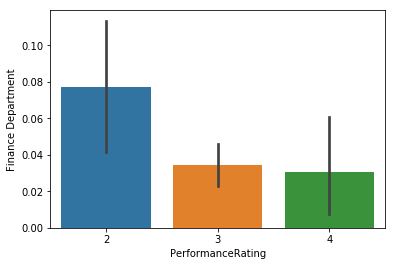

In [50]:
dep_f = data['EmpDepartment'] == 'Finance'
ax = sns.barplot(data['PerformanceRating'],dep_f)
ax.set(ylabel='Finance Department')

[Text(0,0.5,'DataScience Department')]

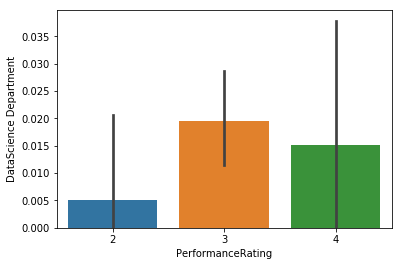

In [52]:
dep_f = data['EmpDepartment'] == 'Data Science'
ax = sns.barplot(data['PerformanceRating'],dep_f)
ax.set(ylabel='DataScience Department')

[Text(0,0.5,'Development Department')]

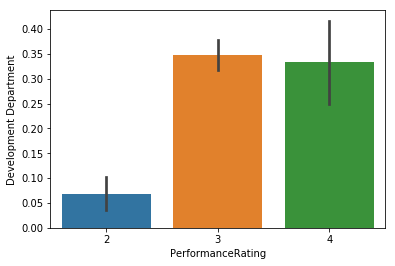

In [54]:
dep_f = data['EmpDepartment'] == 'Development'
ax = sns.barplot(data['PerformanceRating'],dep_f)
ax.set(ylabel='Development Department')

[Text(0,0.5,'R & D Department')]

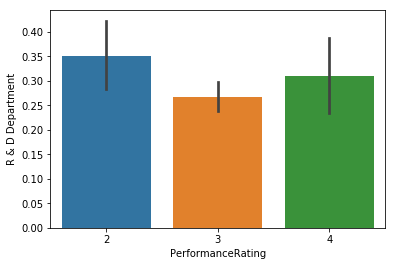

In [56]:
dep_f = data['EmpDepartment'] == 'Research & Development'
ax = sns.barplot(data['PerformanceRating'],dep_f)
ax.set(ylabel='R & D Department')

[Text(0,0.5,'Sales Department')]

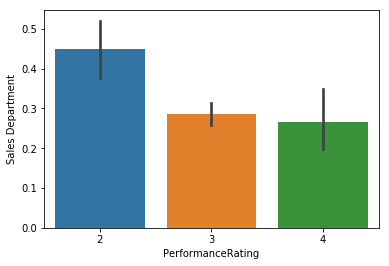

In [17]:
dep_f = data['EmpDepartment'] == 'Sales'
ax = sns.barplot(data['PerformanceRating'],dep_f)
ax.set(ylabel='Sales Department')

[Text(0,0.5,'HR Department')]

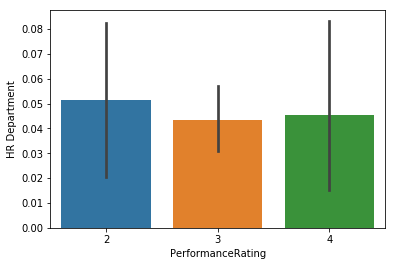

In [18]:
dep_f = data['EmpDepartment'] == 'Human Resources'
ax = sns.barplot(data['PerformanceRating'],dep_f)
ax.set(ylabel='HR Department')

In [59]:
data.dtypes

EmpNumber                       object
Age                              int64
Gender                          object
EducationBackground             object
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager     

In [60]:
data=pd.get_dummies(data, columns=['Gender','EducationBackground'])

In [62]:
data = pd.get_dummies(data, columns=['MaritalStatus','EmpDepartment','EmpJobRole','BusinessTravelFrequency','OverTime'])

In [65]:
data = pd.get_dummies(data, columns= ['Attrition'])

In [4]:
data_Finance = data[data.EmpDepartment == 'Finance']
data_RandD = data[data.EmpDepartment == 'Research & Development']
data_DataSceince = data[data.EmpDepartment == 'Data Science']
data_development = data[data.EmpDepartment == 'Development']
data_Sales = data[data.EmpDepartment == 'Sales']
data_HR = data[data.EmpDepartment == 'Human Resources']

In [14]:
from collections import Counter

In [11]:
datan_Finance = data_Finance[['EmpDepartment','EmpJobLevel','PerformanceRating']]
datan_Finance.to_csv("datan_Finance.csv")

In [15]:
data_Finance1 = data_Finance[data_Finance.EmpJobLevel == 1]
Counter(data_Finance1.PerformanceRating)

Counter({3: 13, 2: 6, 4: 1})

In [16]:
data_Finance2 = data_Finance[data_Finance.EmpJobLevel == 2]
Counter(data_Finance2.PerformanceRating)

Counter({2: 4, 3: 13, 4: 2})

In [18]:
data_Finance3 = data_Finance[data_Finance.EmpJobLevel == 3]
Counter(data_Finance3.PerformanceRating)

Counter({3: 3, 2: 1})

In [19]:
data_Finance4 = data_Finance[data_Finance.EmpJobLevel == 4]
Counter(data_Finance2.PerformanceRating)

Counter({2: 4, 3: 13, 4: 2})

In [20]:
data_Finance5 = data_Finance[data_Finance.EmpJobLevel == 5]
Counter(data_Finance5.PerformanceRating)

Counter({2: 1})

In [27]:
data_DataSceince1 = data_DataSceince[data_DataSceince.EmpJobLevel == 1]
Counter(data_DataSceince1.PerformanceRating)

Counter({3: 7, 4: 1})

In [28]:
data_DataSceince2 = data_DataSceince[data_DataSceince.EmpJobLevel == 2]
Counter(data_DataSceince2.PerformanceRating)

Counter({3: 6, 4: 1})

In [29]:
data_DataSceince3 = data_DataSceince[data_DataSceince.EmpJobLevel == 3]
Counter(data_DataSceince3.PerformanceRating)

Counter({3: 2})

In [30]:
data_DataSceince4 = data_DataSceince[data_DataSceince.EmpJobLevel == 4]
Counter(data_DataSceince4.PerformanceRating)

Counter({3: 1})

In [31]:
data_DataSceince5 = data_DataSceince[data_DataSceince.EmpJobLevel == 5]
Counter(data_DataSceince5.PerformanceRating)

Counter({2: 1, 3: 1})

In [35]:
data_RandD1 = data_RandD[data_RandD.EmpJobLevel == 1]
Counter(data_RandD1.PerformanceRating)

Counter({3: 107, 2: 26, 4: 20})

In [36]:
data_RandD2 = data_RandD[data_RandD.EmpJobLevel == 2]
Counter(data_RandD2.PerformanceRating)

Counter({3: 64, 2: 24, 4: 10})

In [37]:
data_RandD3 = data_RandD[data_RandD.EmpJobLevel == 3]
Counter(data_RandD3.PerformanceRating)

Counter({3: 33, 2: 10, 4: 6})

In [38]:
data_RandD4 = data_RandD[data_RandD.EmpJobLevel == 4]
Counter(data_RandD4.PerformanceRating)

Counter({3: 18, 4: 2, 2: 6})

In [39]:
data_RandD5 = data_RandD[data_RandD.EmpJobLevel == 5]
Counter(data_RandD5.PerformanceRating)

Counter({2: 2, 3: 12, 4: 3})

In [42]:
data_development1 = data_development[data_development.EmpJobLevel == 1]
Counter(data_development1.PerformanceRating)

Counter({3: 141, 4: 24, 2: 5})

In [43]:
data_development2 = data_development[data_development.EmpJobLevel == 2]
Counter(data_development2.PerformanceRating)

Counter({3: 91, 4: 12})

In [44]:
data_development3 = data_development[data_development.EmpJobLevel == 3]
Counter(data_development3.PerformanceRating)

Counter({4: 6, 3: 35, 2: 5})

In [46]:
data_development4 = data_development[data_development.EmpJobLevel == 4]
Counter(data_development4.PerformanceRating)

Counter({3: 21, 4: 2, 2: 1})

In [47]:
data_development5 = data_development[data_development.EmpJobLevel == 5]
Counter(data_development5.PerformanceRating)

Counter({3: 16, 2: 2})

In [48]:
data_HR1 = data_HR[data_HR.EmpJobLevel == 1]
Counter(data_HR1.PerformanceRating)

Counter({3: 17, 2: 7, 4: 2})

In [49]:
data_HR2 = data_HR[data_HR.EmpJobLevel == 2]
Counter(data_HR2.PerformanceRating)

Counter({3: 10, 4: 2, 2: 1})

In [50]:
data_HR3 = data_HR[data_HR.EmpJobLevel == 3]
Counter(data_HR3.PerformanceRating)

Counter({2: 1, 3: 4, 4: 1})

In [51]:
data_HR4 = data_HR[data_HR.EmpJobLevel == 4]
Counter(data_HR4.PerformanceRating)

Counter({3: 3, 4: 1})

In [52]:
data_HR5 = data_HR[data_HR.EmpJobLevel == 5]
Counter(data_HR5.PerformanceRating)

Counter({3: 4, 2: 1})

In [54]:
data_Sales1 = data_Sales[data_Sales.EmpJobLevel == 1]
Counter(data_Sales1.PerformanceRating)

Counter({3: 50, 2: 10, 4: 3})

In [55]:
data_Sales2 = data_Sales[data_Sales.EmpJobLevel == 2]
Counter(data_Sales2.PerformanceRating)

Counter({3: 136, 4: 22, 2: 43})

In [56]:
data_Sales3 = data_Sales[data_Sales.EmpJobLevel == 3]
Counter(data_Sales3.PerformanceRating)

Counter({4: 4, 3: 43, 2: 19})

In [57]:
data_Sales4 = data_Sales[data_Sales.EmpJobLevel == 4]
Counter(data_Sales4.PerformanceRating)

Counter({3: 18, 4: 3, 2: 9})

In [58]:
data_Sales5 = data_Sales[data_Sales.EmpJobLevel == 5]
Counter(data_Sales5.PerformanceRating)

Counter({4: 3, 2: 6, 3: 4})

In [87]:
X = data.drop(['PerformanceRating','EmpNumber'], axis = 1).values

In [74]:
Y = data.PerformanceRating.values

In [98]:
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.33,random_state = 10)

In [91]:
C = 1

In [92]:
svc_rbf = svm.SVC(kernel='rbf', gamma=0.5, C=C).fit(X, Y)
svc_rbf.fit(x_train, y_train)
predicted= svc_rbf.predict(x_test)
cnf_matrix = confusion_matrix(y_test, predicted)
print(cnf_matrix)
print(accuracy_score(y_test,predicted))

[[  0 104   0]
 [  0 426   0]
 [  0  70   0]]
0.71


In [93]:
model_mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),batch_size=10,learning_rate_init=0.01,max_iter=2000,random_state=10)
model_mlp.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size=10, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
       learning_rate_init=0.01, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=10, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [94]:
y_ann_predict = model_mlp.predict(x_test)

In [95]:
print(classification_report(y_test,y_ann_predict))

             precision    recall  f1-score   support

          2       0.74      0.16      0.27       104
          3       0.77      0.89      0.83       426
          4       0.48      0.60      0.54        70

avg / total       0.73      0.73      0.69       600



In [96]:
confusion_matrix(y_test,y_ann_predict)

array([[ 17,  84,   3],
       [  6, 378,  42],
       [  0,  28,  42]], dtype=int64)

In [97]:
print(accuracy_score(y_test,y_ann_predict))

0.7283333333333334


In [104]:
import xgboost
from xgboost import XGBClassifier

In [105]:
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [107]:
y_pred_xgb = model.predict(x_test)

C:\Users\PranaviPadegal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [108]:
confusion_matrix(y_test,y_pred_xgb)

array([[ 60,  10,   1],
       [  5, 274,   6],
       [  1,   8,  31]], dtype=int64)

In [109]:
print(accuracy_score(y_test,y_pred_xgb))

0.9217171717171717


In [110]:
print(classification_report(y_test,y_pred_xgb))

             precision    recall  f1-score   support

          2       0.91      0.85      0.88        71
          3       0.94      0.96      0.95       285
          4       0.82      0.78      0.79        40

avg / total       0.92      0.92      0.92       396



In [30]:
dep_f = data['EmpDepartment'] == 'Finance'
ax = sns.barplot(dep_f['EmpEnvironmentSatisfaction'],data)
ax.set(ylabel='Finance Department')

KeyError: 'EmpEnvironmentSatisfaction'

In [27]:
dep_f.head()

482    True
484    True
485    True
486    True
487    True
Name: EmpDepartment, dtype: bool

[Text(0,0.5,'HR Department')]

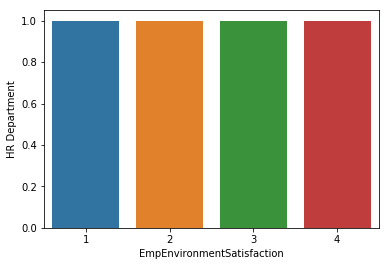

In [28]:
dep_f = data['EmpDepartment'] == 'Human Resources'
ax = sns.barplot(data_HR['EmpEnvironmentSatisfaction'],dep_f)
ax.set(ylabel='HR Department')